<a href="https://colab.research.google.com/github/Haseeb-zai30/Ai-notebooks/blob/main/day_8_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Multiple Linear Regression

**Definition:**  
Multiple Linear Regression is an extension of simple linear regression where the target variable $Y$ is predicted using two or more input variables $X_1, X_2, \dots, X_n$.

**Mathematical Model:**  
The equation of Multiple Linear Regression (MLR) is:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:

- $Y$ = Dependent variable (target/output)  
- $X_1, X_2, \dots, X_n$ = Independent variables (inputs/features)  
- $\beta_0$ = Intercept (value of $Y$ when all $X_i = 0$)  
- $\beta_1, \beta_2, \dots, \beta_n$ = Coefficients (how much $Y$ changes with a one-unit change in $X_i$)  
- $\epsilon$ = Error term (difference between predicted and actual values)


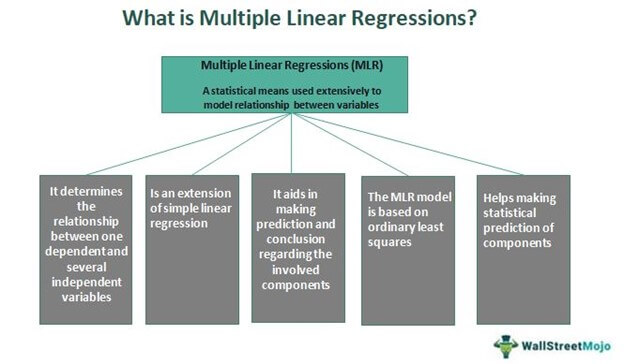

## Simple Linear Regression Vs Multiple Linear Regression:
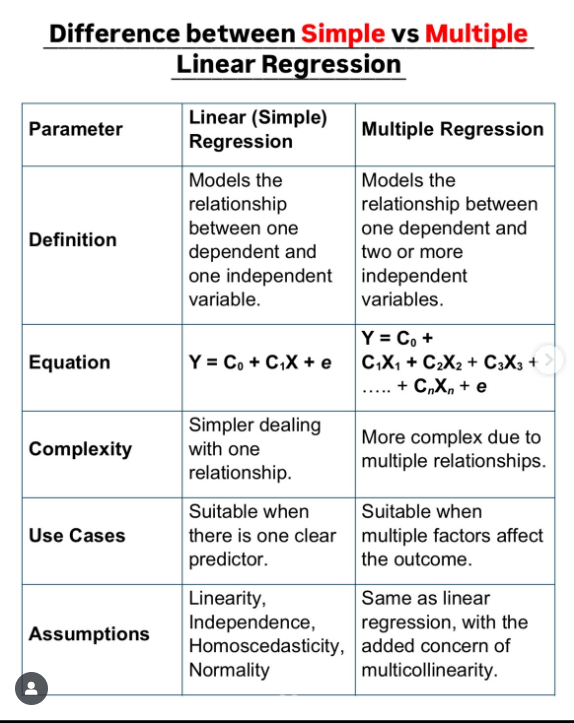

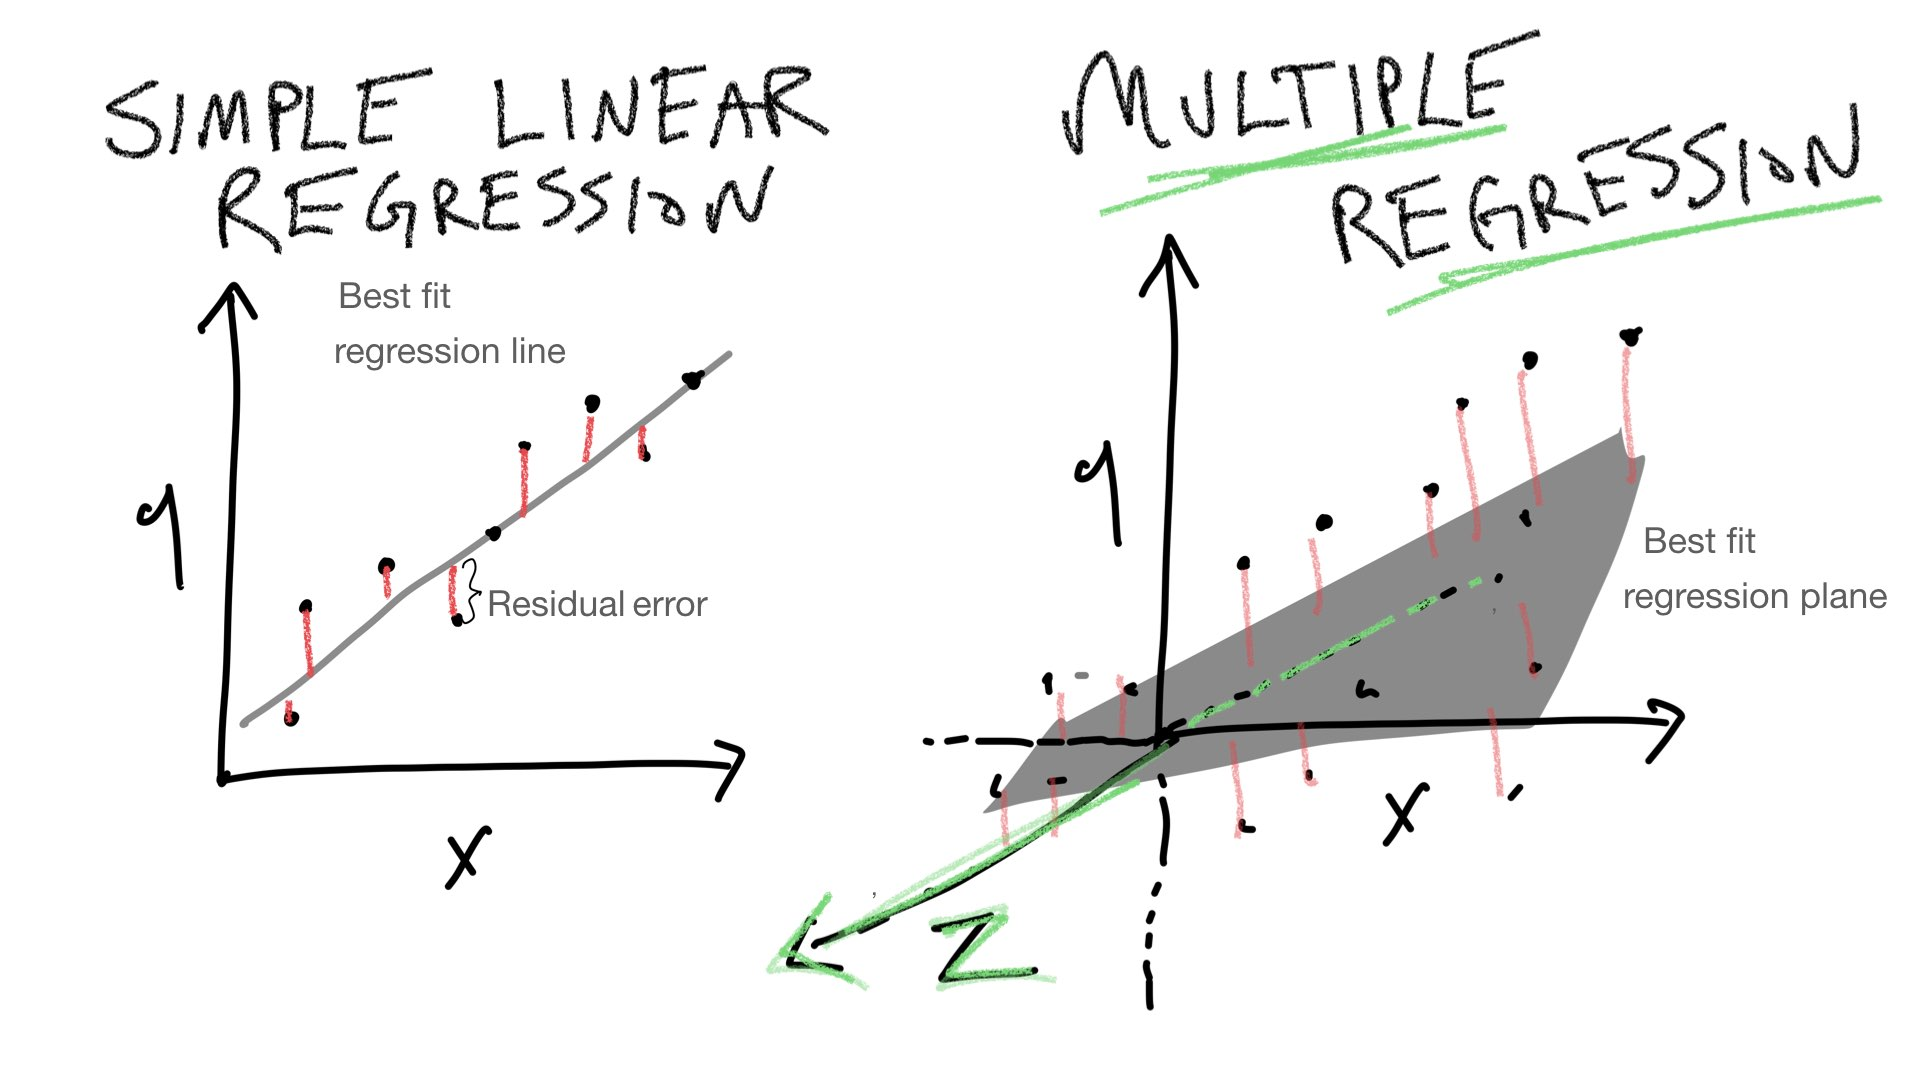

### Key Points:
MLR allows predicting a target based on multiple factors simultaneously.

Each feature $X_i$ has its own coefficient $\beta_i$, which indicates its influence on the target.

The goal is to find the best coefficients $\beta_0, \beta_1, \dots, \beta_n$ that minimize the error (usually using Mean Squared Error, MSE).


## Scenario
Suppose we want to predict CO₂ emissions of cars:

The Multiple Linear Regression model can be written as:

$$
\text{CO2 Emissions} = \beta_0 + \beta_1 (\text{Engine Size}) + \beta_2 (\text{Cylinders}) + \beta_3 (\text{Fuel Consumption}) + \epsilon
$$

Here:

- Engine Size, Cylinders, and Fuel Consumption are the independent variables ($X_1, X_2, X_3$).  
- CO₂ Emissions is the dependent variable ($Y$).  
- The model learns the best coefficients $\beta_0, \beta_1, \beta_2, \beta_3$ to predict CO₂ emissions accurately.


## Multivariate Linear Regression: Predicting CO₂ Emissions

We are now using multiple features (Engine size, Cylinders, Fuel consumption) to predict CO₂ emissions. This usually gives better predictions than single-variable regression.

## Step 1: Import Required Libraries

In [3]:
import requests          # to download dataset from the internet
import numpy as np       # for numerical computations and arrays
import matplotlib.pyplot as plt  # for plotting graphs
import pandas as pd      # for handling datasets as DataFrames


requests → fetch the CSV file.

numpy → manipulate data arrays, calculate errors, etc.

matplotlib → visualize relationships and predictions.

pandas → manage tabular data easily.

# Step 2: Download and Save Dataset

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)  # download dataset from URL

with open("data.csv", "wb") as file:  # save dataset locally
    file.write(response.content)      # write content to file
    print("DONE")                     # confirmation message


DONE


Fetch the dataset from IBM Cloud.

Save it as data.csv locally.

wb → write in binary mode.

## Step 3: Load the Dataset into a DataFrame


In [5]:
df = pd.read_csv("data.csv")  # load CSV into pandas DataFrame

# Select features we want for prediction
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# View first 9 rows to understand the data
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


ENGINESIZE, CYLINDERS, FUELCONSUMPTION_* → independent variables (features).

CO2EMISSIONS → dependent variable (what we want to predict).

Using .head() gives a preview of the dataset.

## Step 4: Split Dataset into Training and Testing Sets

In [6]:
msk = np.random.rand(len(df)) < 0.8  # create mask: 80% training, 20% testing
train = cdf[msk]                     # training set
test = cdf[~msk]                     # testing set


Randomly split data:

80% → training (model learns)

20% → testing (model evaluation)

np.random.rand(len(df)) < 0.8 → returns True for 80% of rows.

## Step 5: Create and Train the Linear Regression Model

In [21]:
from sklearn import linear_model

regr = linear_model.LinearRegression()  # initialize the model

# Prepare feature matrix X and target vector y
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

# Train the model on training data
# Train
regr.fit(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY']], train[['CO2EMISSIONS']])

# Predict
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY']])



`LinearRegression()` → creates a multivariate linear regression model.

- $X$ → 5 features (inputs)  
- $y$ → CO₂ emissions (output)  
- `fit()` → computes the best coefficients for all features using Ordinary Least Squares (OLS)  

The model learns the equation:

$$
y = b + m_1 x_1 + m_2 x_2 + \dots + m_n x_n
$$

Where:

- $m_i$ = slope for each feature  
- $b$ = intercept


## Step 6: Check Model Coefficients

In [22]:
print('Coefficients: ', regr.coef_)


Coefficients:  [[10.59442635  7.92085558 10.56841974 -1.58784134]]


Each coefficient represents how much CO₂ emissions change per unit increase in each feature.

Example: if ENGINESIZE coefficient = 38 → increasing engine size by 1 liter increases CO₂ by ~38 g/km, holding other factors constant.

## Step 7: Make Predictions on Test Set

In [23]:
# Predict
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY',]])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


predict() → generates predicted CO₂ emissions for test data.

x_test → features of the test set.

y_test → actual CO₂ emissions of test set.

## Step 8: Evaluate the Model

In [24]:
# Mean Squared Error (average of squared differences between predicted and actual)
print("Mean Squared Error (MSE) : %.2f" % np.mean((y_hat - y_test) ** 2))



Mean Squared Error (MSE) : 620.36


In [25]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.86


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


MSE → smaller value means predictions are closer to actual values.

Variance score / R² → closer to 1 → model explains more variability.

## Step 9: Visualize Actual vs Predicted Values

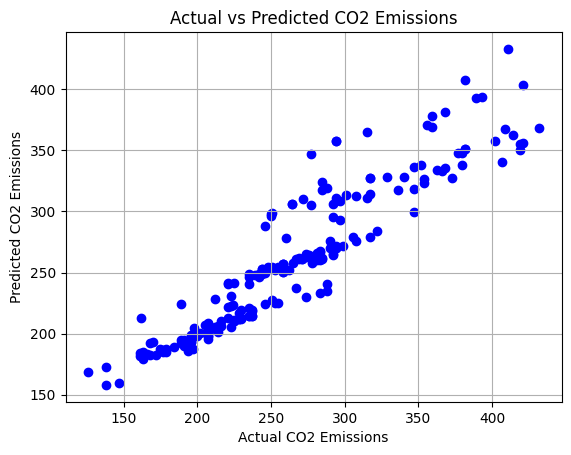

In [26]:
plt.scatter(y_test, y_hat, color='blue')  # scatter plot: predicted vs actual
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid(True)
plt.show()


Each dot = one car in the test set.

X-axis → actual CO₂ emissions

Y-axis → predicted CO₂ emissions

Ideally, dots align along the diagonal line → perfect prediction.

The plot helps visually assess model accuracy.

## Take Aways:
Multiple features improve prediction → better than single-variable regression.

Coefficients tell the importance of each feature.

R² and MSE show model performance → higher R² + lower MSE = better.

Scatter plot gives intuitive sense of prediction accuracy.